## Tensorflow Exploration 

### Importing + splitting data

In [32]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import pad_sequences

In [7]:
#sample dataset: https://keras.io/api/datasets/fashion_mnist/
data = keras.datasets.fashion_mnist
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [33]:
(X_train, y_train), (X_test, y_test) = data.load_data()
X_train = X_train/250; X_test = X_train/250 #compress images

### Exploring data

In [34]:
type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [35]:
#images are 28x28 with each grayscale value represented by image[i][j]
np.shape(X_train), np.shape(y_train)

((60000, 28, 28), (60000,))

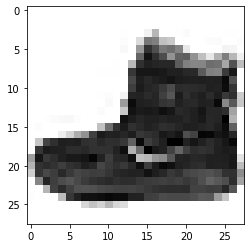

In [36]:
plt.imshow(X_train[0], cmap=plt.cm.binary)
plt.show()

### Model training + evaluation

In [37]:
#softmax -> makes sure output layer is a probability
#epoch -> how many times the network iterates through the dataset
#Keras.sequential -> layers definition
#cross-entropy is used when true labels are one-hot encoded

model = keras.Sequential([
    keras.layers.Flatten(input_shape=np.shape(X_train[0])),
    keras.layers.Dense(128,activation="relu"), #tot pixels
    keras.layers.Dense(10,activation="softmax") #tot outcomes
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [38]:
model.fit(X_train, y_train, epochs=4)

Epoch 1/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4955 - accuracy: 0.8256
Epoch 2/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3722 - accuracy: 0.8674
Epoch 3/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3355 - accuracy: 0.8772
Epoch 4/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3120 - accuracy: 0.8864


In [44]:
lost, acc = model.evaluate(X_test[-10000:], y_test)
print(f'Accuracy: {acc}') #most likely due to data being mixed up

313/313 [==============================] - 1s 2ms/step - loss: 3.3715 - accuracy: 0.1000
Accuracy: 0.10000000149011612


In [47]:
model.predict(X_test)[0]

1875/1875 [==============================] - 3s 2ms/step


array([0.07625948, 0.00595636, 0.04536819, 0.04542431, 0.01308424,
       0.69784695, 0.06035765, 0.03487037, 0.01782346, 0.00300902],
      dtype=float32)

## Tensorflow (Text Classification)

### Import + preprocess data

In [5]:
data = keras.datasets.imdb

(X_train,y_train), (X_test,y_test) = data.load_data(num_words=10000)

17464789/17464789 [==============================] - 6s 0us/step


In [7]:
len(X_train), len(y_train), len(X_test), len(y_test)

(25000, 25000, 25000, 25000)

In [11]:
X_train[0] #enconded review

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [12]:
y_train[0] #postive/negative

1

In [19]:
word_index = keras.datasets.imdb.get_word_index()
word_index = {j+3:i for i,j in word_index.items()} 

In [17]:
word_index #word mapping

{34704: 'fawn',
 52009: 'tsukino',
 52010: 'nunnery',
 16819: 'sonja',
 63954: 'vani',
 1411: 'woods',
 16118: 'spiders',
 2348: 'hanging',
 2292: 'woody',
 52011: 'trawling',
 52012: "hold's",
 11310: 'comically',
 40833: 'localized',
 30571: 'disobeying',
 52013: "'royale",
 40834: "harpo's",
 52014: 'canet',
 19316: 'aileen',
 52015: 'acurately',
 52016: "diplomat's",
 25245: 'rickman',
 6749: 'arranged',
 52017: 'rumbustious',
 52018: 'familiarness',
 52019: "spider'",
 68807: 'hahahah',
 52020: "wood'",
 40836: 'transvestism',
 34705: "hangin'",
 2341: 'bringing',
 40837: 'seamier',
 34706: 'wooded',
 52021: 'bravora',
 16820: 'grueling',
 1639: 'wooden',
 16821: 'wednesday',
 52022: "'prix",
 34707: 'altagracia',
 52023: 'circuitry',
 11588: 'crotch',
 57769: 'busybody',
 52024: "tart'n'tangy",
 14132: 'burgade',
 52026: 'thrace',
 11041: "tom's",
 52028: 'snuggles',
 29117: 'francesco',
 52030: 'complainers',
 52128: 'templarios',
 40838: '272',
 52031: '273',
 52133: 'zaniacs',

In [21]:
word_index[0]='<PAD>'
word_index[1]='<START>'
word_index[2]='<UNK>'
word_index[3]='<UNUSED>'

In [23]:
decode = lambda text: ' '.join([word_index.get(i,'?') for i in text])
decode(X_train[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [25]:
#pad review to be max
min([len(review) for review in X_train+X_test]), max([len(review) for review in X_train+X_test])

(70, 2697)

In [36]:
X_train = pad_sequences(X_train,
                         value=0,
                         padding="post",
                         maxlen=2697)

X_test = pad_sequences(X_test,
                         value=0,
                         padding="post",
                         maxlen=2697)



In [35]:
min([len(review) for review in X_train]), max([len(review) for review in X_train])

(2697, 2697)

### Build model

In [39]:
model = keras.Sequential()
model.add(keras.layers.Embedding(1000,16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation="relu"))
model.add(keras.layers.Dense(1, activation='sigmoid'))